In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def data_path():
    return '/media/vitaly/4759e668-4a2d-4997-8dd2-eb4d25313d90/vitaly/CTau/Data'

In [8]:
def allowed_energies():
    return [0, 100, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000]

In [9]:
def keys():
    return ['pi0', 'gamma']

In [10]:
def data_file(key, energy):
    assert key in keys()
    assert energy in allowed_energies()
    return '/'.join([data_path(), f'clusters_{key}_mom_{energy}_MeV.dat'])

In [27]:
def parse_data(key, energy):
    oneclu, twoclu = [], []
    with open(data_file(key, energy), 'r') as ifile:
        clusters, clu, cluidx = [], [], None
        ifile.readline()
        eventcnt = 0

        for lnum, line in enumerate(ifile):
            if line.strip() == 'new event':
                eventcnt += 1
                if len(clu) == 25:
                    clusters.append(clu)

                if len(clusters) == 2:
                    twoclu.append(clusters)
                elif clusters:
                    oneclu.append(clusters[0])
                clusters, clu, cluidx = [], [], None
                continue

            idx, eclu, zidx, phidx = map(float, line.strip().split())
            idx, zidx, phidx = map(int, [idx, zidx, phidx])
            if idx == cluidx:
                clu.append([eclu, zidx, phidx])
            else:
                if len(clu) == 25:
                    clusters.append(clu)
                clu = [[eclu, zidx, phidx]]
                cluidx = idx
    return np.array(oneclu), np.array(twoclu), eventcnt

In [28]:
oneclu, twoclu, events = parse_data('pi0', 2000)
events

99999

In [29]:
oneclu.shape

(75476, 25, 3)

In [30]:
twoclu.shape

(23459, 2, 25, 3)

In [31]:
oneclu.shape[0] + twoclu.shape[0]

98935

In [78]:
def draw_cluster(clu):
    plt.figure(figsize=(12, 8))
    plt.xlim((0, 120))
    plt.ylim((0, 115))
    plt.minorticks_on()
    plt.grid(which='both')
    plt.scatter(clu[:, 1], clu[:, 2], s=clu[:, 0] * 100)
    plt.tight_layout()

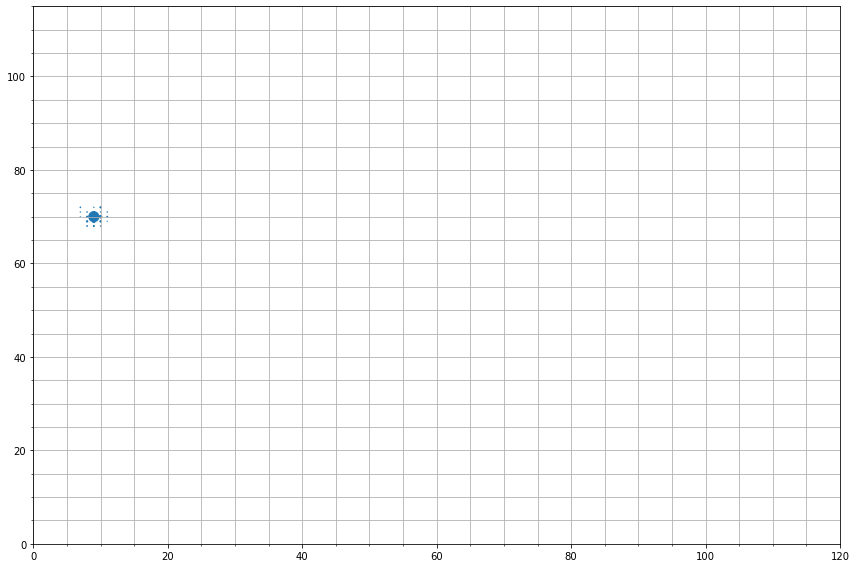

In [85]:
draw_cluster(oneclu[3])

In [75]:
print(oneclu[7][:5])

[[1.26876e+00 3.40000e+01 0.00000e+00]
 [5.80977e-02 3.40000e+01 1.13000e+02]
 [4.41887e-02 3.50000e+01 0.00000e+00]
 [1.47658e-02 3.30000e+01 1.13000e+02]
 [1.07760e-02 3.30000e+01 0.00000e+00]]


In [61]:
def draw_energy_spectrum(eclu, key, epcl, xlbl):
    plt.figure(figsize=(8, 6))
    plt.minorticks_on()
    plt.grid(which='both')
    plt.hist(eclu, bins=100, histtype='step')
    plt.title(f'{key} {epcl} MeV', fontsize=16)
    plt.xlabel(f'{xlbl} (GeV)', fontsize=14)
    plt.tight_layout()
    plt.savefig(f'plots/{key}_{epcl}_{xlbl.replace(" ", "_")}.png')

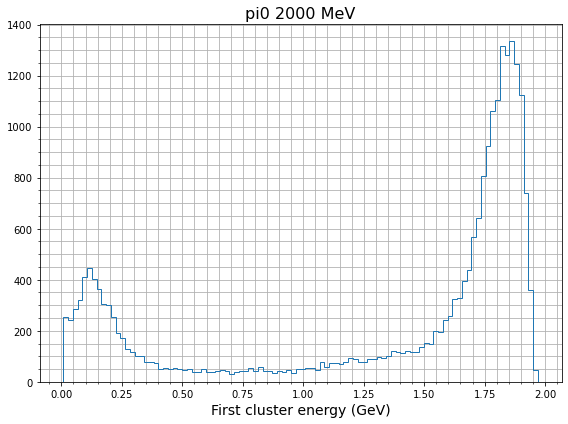

In [63]:
energies = twoclu.sum(axis=2)[:, :, 0]
draw_energy_spectrum(energies[:, 0], 'pi0', 2000, 'First cluster energy')

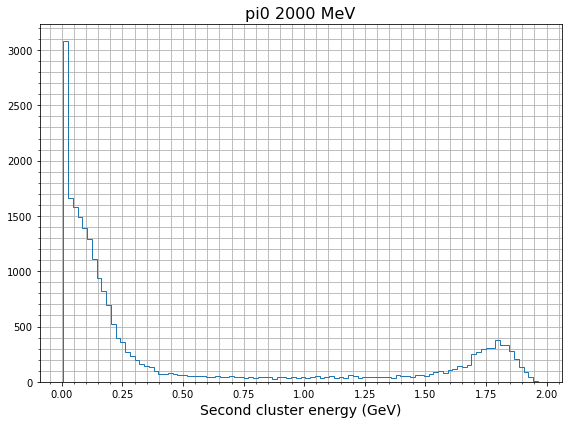

In [64]:
draw_energy_spectrum(energies[:, 1], 'pi0', 2000, 'Second cluster energy')

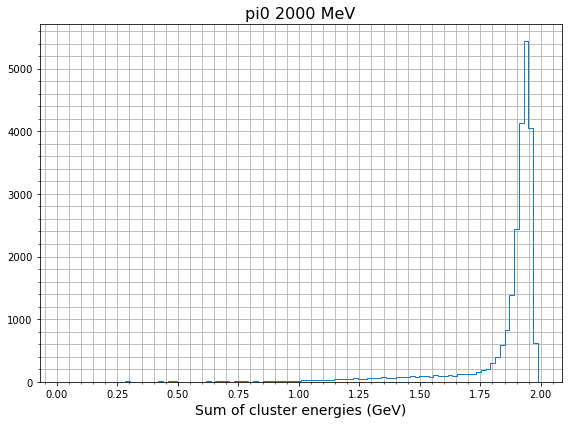

In [65]:
draw_energy_spectrum(energies.sum(axis=1), 'pi0', 2000, 'Sum of cluster energies')

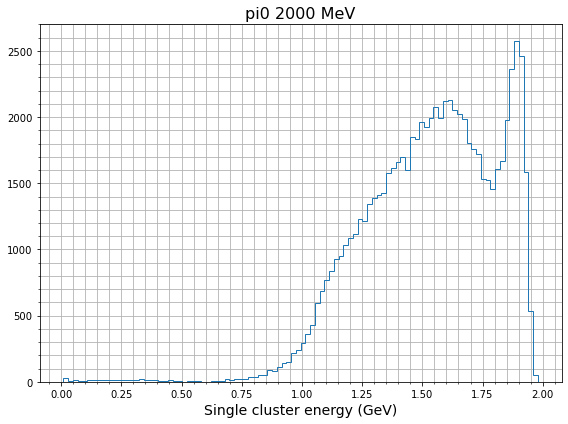

In [66]:
draw_energy_spectrum(oneclu.sum(axis=1)[:, 0], 'pi0', 2000, 'Single cluster energy')

In [86]:
goneclu, gtwoclu, gevents = parse_data('gamma', 2000)

In [87]:
goneclu.shape

(96471, 25, 3)

In [88]:
gtwoclu.shape

(3527, 2, 25, 3)

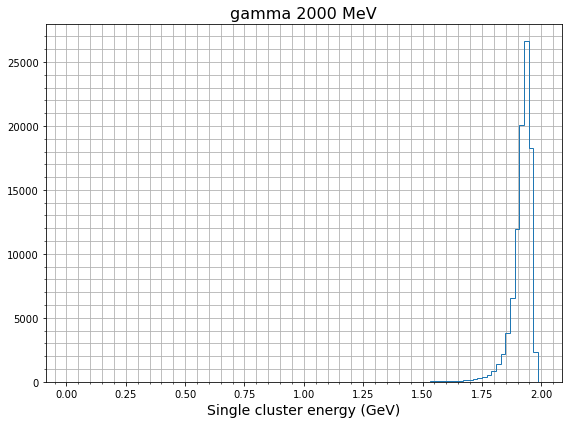

In [89]:
draw_energy_spectrum(goneclu.sum(axis=1)[:, 0], 'gamma', 2000, 'Single cluster energy')